In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# ---- Small-ε closed-form for static forces (used at Λ* = Λ ± σ) ----
def FrFt_bar(Lambda_star, L_over_D=1.0):
    """
    Dimensionless force components for the small-ε static solution at Λ*.
    F̄r + i F̄t = (i Λ*)/(1 + i Λ*) * [1 - tanh(η L/D)/(η L/D)] * (π/2),
    where η = sqrt(1 + i Λ*).
    Returns (F̄r, F̄t).
    """
    i = 1j
    eta = np.sqrt(1.0 + i * Lambda_star)
    H = 1.0 - np.tanh(eta * L_over_D) / (eta * L_over_D)
    G = (i * Lambda_star) / (1.0 + i * Lambda_star) * H * (np.pi / 2.0)
    return np.real(G), np.imag(G)  # F̄r, F̄t

# ---- Dynamic stiffness coefficients from section 9.3.2 (dimensionless) ----
def stiffness_Kxx_Kxy(Lambda, sigma_vals, L_over_D=1.0):
    """
    Compute dynamic stiffness coefficients Kxx and Kxy.
    """
    Kxx = np.zeros_like(sigma_vals, dtype=float)
    Kxy = np.zeros_like(sigma_vals, dtype=float)
    for k, s in enumerate(sigma_vals):
        Fr_m, Ft_m = FrFt_bar(Lambda - s, L_over_D)
        Fr_p, Ft_p = FrFt_bar(Lambda + s, L_over_D)
        Kxx[k] = 0.5 * (Fr_m + Fr_p)
        Kxy[k] = -0.5 * (Ft_m + Ft_p)
    return Kxx, Kxy

In [4]:

# ---- Small-ε closed-form building blocks ----
def FrFt_bar(Lambda_star, L_over_D=1.0):
    """
    Dimensionless force components (small-ε static solution) at Λ*.
    F̄r + i F̄t = (i Λ*)/(1 + i Λ*) * [1 - tanh(η L/D)/(η L/D)] * (π/2),
    with η = sqrt(1 + i Λ*).
    """
    i = 1j
    eta = np.sqrt(1.0 + i * Lambda_star)
    H = 1.0 - np.tanh(eta * L_over_D) / (eta * L_over_D)
    G = (i * Lambda_star) / (1.0 + i * Lambda_star) * H * (np.pi / 2.0)
    return np.real(G), np.imag(G)  # F̄r, F̄t

def damping_Cxx_Cxy(Lambda, sigma_vals, L_over_D=1.0):
    """
    Dynamic damping coefficients (dimensionless) for given Λ over σ:
    CXX = -[F̄t(Λ-σ) - F̄t(Λ+σ)]/(2σ)
    CXY = +[F̄r(Λ-σ) - F̄r(Λ+σ)]/(2σ)
    """
    Cxx = np.zeros_like(sigma_vals, dtype=float)
    Cxy = np.zeros_like(sigma_vals, dtype=float)
    for k, s in enumerate(sigma_vals):
        s_eff = s if s != 0 else 1e-12
        Fr_m, Ft_m = FrFt_bar(Lambda - s_eff, L_over_D)
        Fr_p, Ft_p = FrFt_bar(Lambda + s_eff, L_over_D)
        Cxx[k] = -(Ft_m - Ft_p) / (2.0 * s_eff)
        Cxy[k] = +(Fr_m - Fr_p) / (2.0 * s_eff)
    return Cxx, Cxy


In [ ]:

# ---- Physical/geometry parameters ----
mu   = 1.85e-5        # Pa·s (air, ~20–25°C)
pa   = 101325.0       # Pa   (ambient/reference pressure)
R    = 10e-3          # m    shaft radius
c    = 10e-6          # m    radial clearance
L_over_D = 1.0        # L/D = 1

# ---- Dimensionless helper ----
Rc_ratio_sq = (R / c) ** 2

# ---- Define perturbation frequency ν (rad/s), then compute σ properly ----
nu = np.logspace(0, 5, 600)                 # rad/s (e.g., 1 to 1e5)
sigma = 12.0 * mu * nu / pa * Rc_ratio_sq   # σ = (12 μ ν / p_a) * (R/c)^2

# ---- Bearing numbers Λ to plot (can also be computed from ω if desired) ----
Lambda_list = [0.1, 1, 5, 10, 100, 1000]

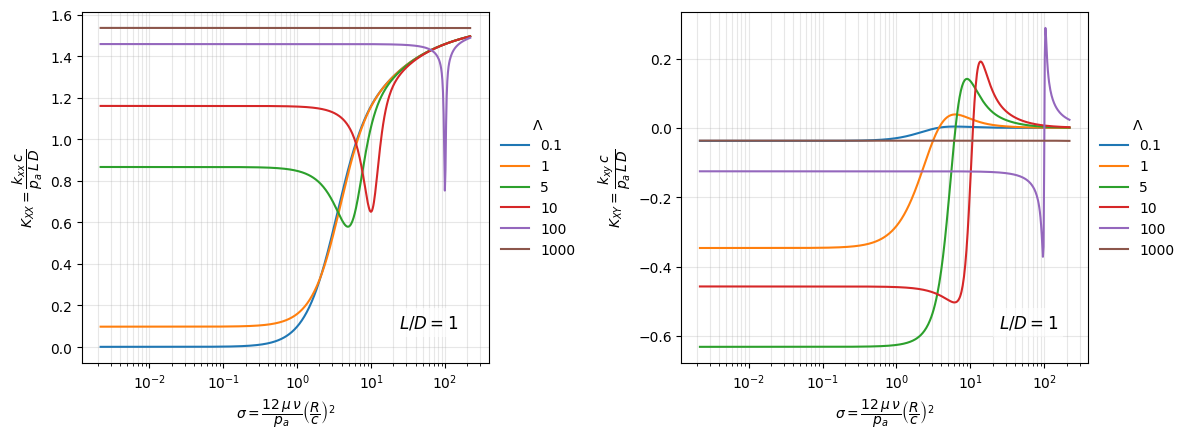

In [ ]:
# ---- Plotting ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# KXX(σ)
for Lambda in Lambda_list:
    Kxx, Kxy = stiffness_Kxx_Kxy(Lambda, sigma, L_over_D)
    ax1.plot(sigma, Kxx, label=f"{Lambda:g}")
ax1.set_xscale('log')
ax1.set_xlabel(r"$\sigma = \dfrac{12\,\mu\,\nu}{p_a}\left(\dfrac{R}{c}\right)^2$", fontsize=14)
ax1.set_ylabel(r"$K_{XX} = \dfrac{k_{xx}\,c}{p_a\,L\,D}$", fontsize=14)
ax1.grid(True, which='both', alpha=0.3)
ax1.legend(title=r"$\Lambda$", loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12, title_fontsize=12)
ax1.text(0.78, 0.1, r"$L/D = 1$", transform=ax1.transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# KXY(σ)
for Lambda in Lambda_list:
    Kxx, Kxy = stiffness_Kxx_Kxy(Lambda, sigma, L_over_D)
    ax2.plot(sigma, Kxy, label=f"{Lambda:g}")
ax2.set_xscale('log')
ax2.set_xlabel(r"$\sigma = \dfrac{12\,\mu\,\nu}{p_a}\left(\dfrac{R}{c}\right)^2$", fontsize=14)
ax2.set_ylabel(r"$K_{XY} = \dfrac{k_{xy}\,c}{p_a\,L\,D}$", fontsize=14)
ax2.grid(True, which='both', alpha=0.3)
ax2.legend(title=r"$\Lambda$", loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12, title_fontsize=12)
ax2.text(0.78, 0.1, r"$L/D = 1$", transform=ax2.transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.tight_layout()
plt.show()

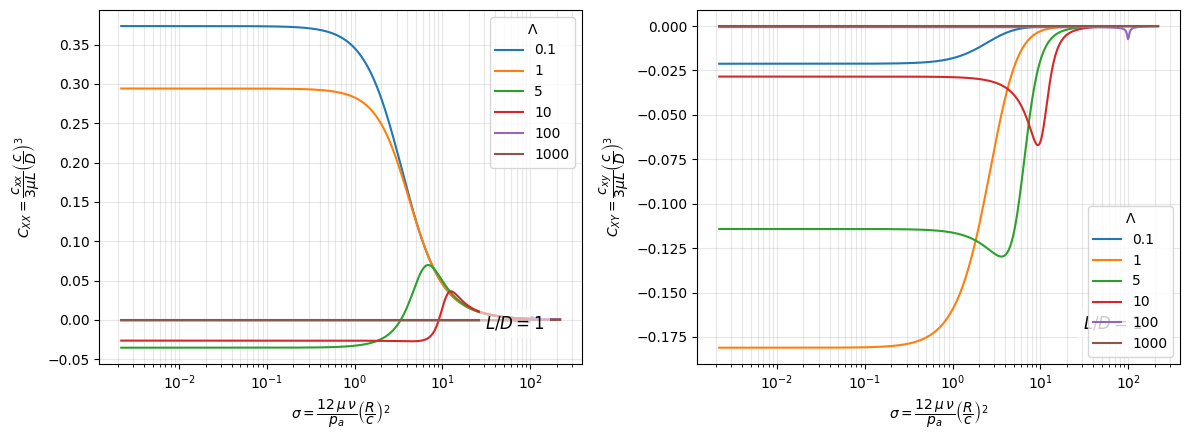

In [7]:
# ---- Dimensionless helper ----
Rc_ratio_sq = (R / c) ** 2

# ---- Define physical perturbation frequency ν (rad/s), then compute σ properly ----
nu = np.logspace(0, 5, 600)  # rad/s, e.g. 1 to 1e5
sigma = 12.0 * mu * nu / pa * Rc_ratio_sq  # σ = (12 μ ν / p_a) * (R/c)^2

# ---- Choose bearing numbers Λ to plot (could also compute from ω) ----
Lambda_list = [0.1, 1, 5, 10, 100, 1000]
# If desired, compute Λ from rotor speed ω (rad/s):
# omega = 2*np.pi*60000  # example 60 krpm
# Lambda = 6.0 * mu * omega / pa * Rc_ratio_sq

# ---- Plotting ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# CXX(σ)
for Lambda in Lambda_list:
    Cxx, Cxy = damping_Cxx_Cxy(Lambda, sigma, L_over_D)
    ax1.plot(sigma, Cxx, label=f"{Lambda:g}")
ax1.set_xscale('log')
ax1.set_xlabel(r"$\sigma = \dfrac{12\,\mu\,\nu}{p_a}\left(\dfrac{R}{c}\right)^2$")
ax1.set_ylabel(r"$C_{XX} = \dfrac{c_{xx}}{3\mu L}\left(\dfrac{c}{D}\right)^3$")
ax1.grid(True, which='both', alpha=0.3)
ax1.legend(title=r"$\Lambda$", loc="best")
ax1.text(0.8, 0.1, r"$L/D = 1$", transform=ax1.transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# CXY(σ)
for Lambda in Lambda_list:
    Cxx, Cxy = damping_Cxx_Cxy(Lambda, sigma, L_over_D)
    ax2.plot(sigma, Cxy, label=f"{Lambda:g}")
ax2.set_xscale('log')
ax2.set_xlabel(r"$\sigma = \dfrac{12\,\mu\,\nu}{p_a}\left(\dfrac{R}{c}\right)^2$")
ax2.set_ylabel(r"$C_{XY} = \dfrac{c_{xy}}{3\mu L}\left(\dfrac{c}{D}\right)^3$")
ax2.grid(True, which='both', alpha=0.3)
ax2.legend(title=r"$\Lambda$", loc="best")
ax2.text(0.8, 0.1, r"$L/D = 1$", transform=ax2.transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.tight_layout()
plt.show()

# Epsilon Calculation

Epsilon (𝜖) represents the eccentricity ratio, which is a measure of the displacement of the rotor center relative to the bearing center. It is defined as the ratio of the eccentricity (distance between the centers) to the radial clearance (c).

In [8]:
# Function to calculate epsilon (eccentricity ratio)
def calculate_epsilon(eccentricity, radial_clearance):
    """
    Calculate the eccentricity ratio (epsilon).

    Parameters:
    eccentricity (float): Distance between the rotor center and bearing center.
    radial_clearance (float): Radial clearance of the bearing.

    Returns:
    float: Eccentricity ratio (epsilon).
    """
    return eccentricity / radial_clearance

# Example usage
eccentricity = 0.0005  # Example value in meters
radial_clearance = 0.00001  # Example value in meters
epsilon = calculate_epsilon(eccentricity, radial_clearance)
print(f"Epsilon (eccentricity ratio): {epsilon}")

Epsilon (eccentricity ratio): 50.0
